# Week 5
# Aidin Attar - 2048654

### Table of contents:
- [Libraries](#lib)
- [Exercise 1 - Detecting a disease](#ex1)
    - [(a) - Probability distribution  of the new method](#ex1a)
    - [(b) - Frequentist estimation of the failure](#ex1b)
    - [(c) - Bayesian computation of the posterior probability](#ex1c)
    - [(d) - Hypothesis Test (Bayesian approach)](#ex1d)
    - [(e) - Hypothesis Test (Frequentist approach) ](#ex1e)
- [Exercise 2 - Deaths by horse kick among the Prussian army](#ex2)
    - [(a) - Death rate's distribution (Uniform Prior)](#ex2a)
    - [(b) - Death rate's distribution (Jeffrey's Prior)](#ex2b)
- [Exercise 3 - Water quality of streams](#ex3)
    - [(a) - Frequentist estimator](#ex3a)
    - [(b) - Posterior distribution with beta prior](#ex3b)
    - [(c) - Bayesian estimator](#ex3c)
    - [(d) - Hypotesis test](#ex3d)
    - [(e) - Frequentist estimator](#ex3e)
    - [(f) - Bayesian estimator with Beta prior and custom prior](#ex3f)
    - [(g) - Mean and variance](#ex3g)
    - [(h) - Hypotesis test](#ex3h)
- [Exercise 4 - MCMC with JAGS](#ex4)
- [Exercise 5 - ](#ex5)
- [Exercise 6 - ](#ex6)

## Libraries<a class="anchor" id="lib"></a>

In [1]:
library(rjags)
library(coda)
library(ggplot2)
library(gridExtra)
library(ggthemes)
library(ggtext)

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs



## Exercise 1 - Detecting a disease<a class="anchor" id="ex1"></a>

In [2]:
p.old <- .15
n     <- 75

### Exercise 1a - Probability distribution  of the new method<a class="anchor" id="ex1a"></a>
We assume an uniform prior: the likelihood will be a binomial distribution and so the posterior pdf is simply proportional to the likelihood. Thus the probability distribution of y follows a binomial distribution.

### Exercise 1b - Frequentist estimation of the failure<a class="anchor" id="ex1b"></a>

In [3]:
y  <- 6
pf <- y / n
cat("The frequentist estimator of the failure probability of the new method is:\n", pf)

The frequentist estimator of the failure probability of the new method is:
 0.08

### Exercise 1c - Bayesian computation of the posterior probability<a class="anchor" id="ex1c"></a>

Warning message:
“Removed 700 row(s) containing missing values (geom_path).”


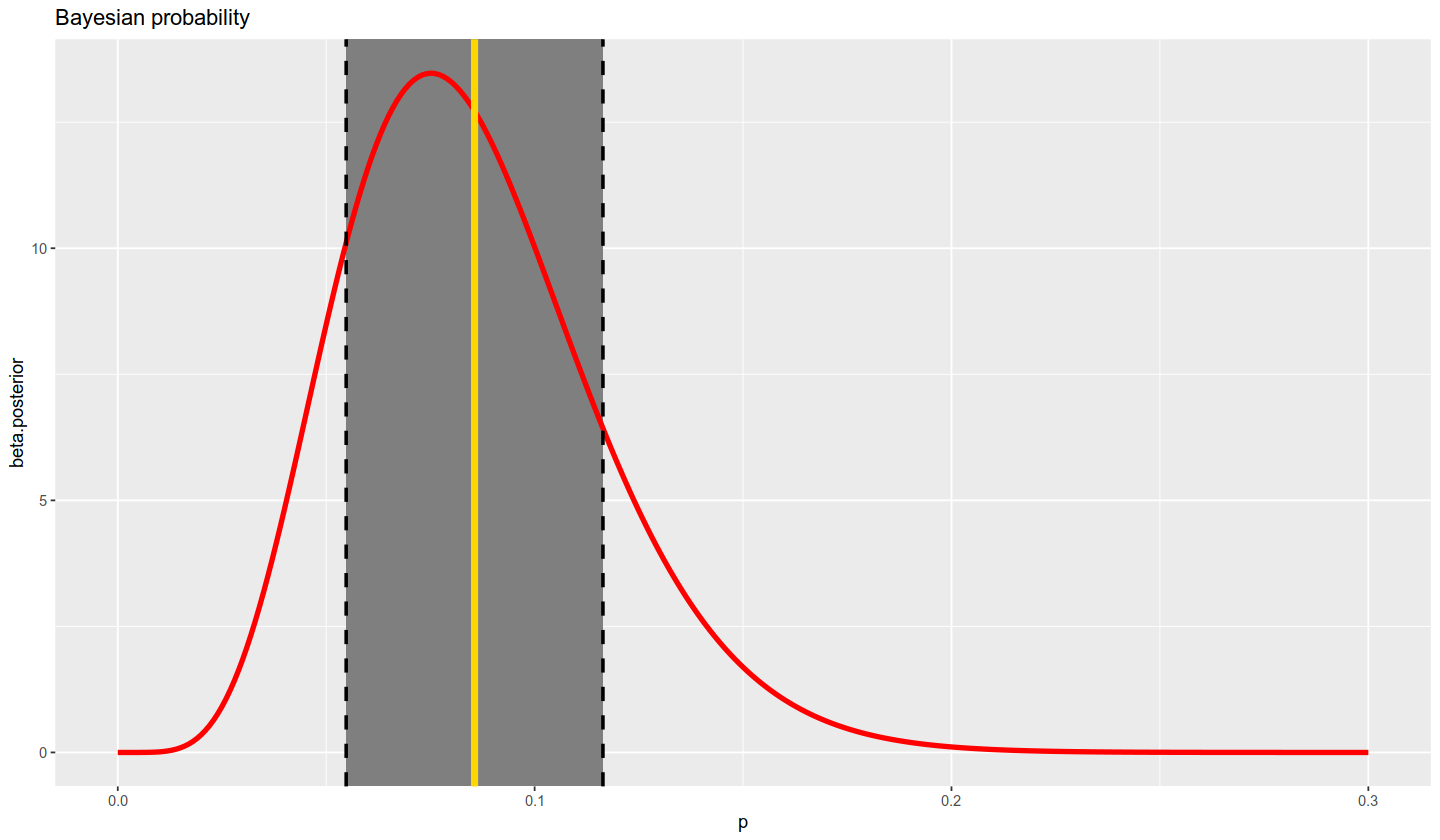

In [4]:
p<-seq(0,1,.001)

mean       <-.15
std        <-.14
sample_size<-mean*(1-mean)/std^2

likelihood<-dbinom(x=y, size=n, prob=p)

alpha.prior<-mean*sample_size
beta.prior <-(1-mean)*sample_size

prior<-dbeta(p, alpha.prior, beta.prior)

# rule of conjugate priors
alpha.post<-alpha.prior+y
beta.post <-beta.prior-y+n
beta.posterior<-dbeta(p, alpha.post, beta.post)

mean.post    <-(alpha.post)/(alpha.post+beta.post)
variance.post<-alpha.post*beta.post/((alpha.post+beta.post)^2 *(alpha.post+beta.post+1))

options(repr.plot.width = 12, repr.plot.height = 7)

data = data.frame(p,prior,beta.posterior)

p <- ggplot(data=data)
p <- p + geom_rect(aes(xmin=mean.post-sqrt(variance.post), xmax=mean.post+sqrt(variance.post),ymin=-Inf,ymax=Inf), fill='forestgreen', alpha= 0.003)
p <- p + geom_line(aes(p, beta.posterior),  color="red",   size=1.5)
#p <- p + geom_line(aes(p, prior),           color="blue",  size=1.5)
p <- p + geom_vline(xintercept = mean.post, color="gold", size=2)
p <- p + geom_vline(xintercept = mean.post-sqrt(variance.post), linetype = "dashed", color="black", size=1)
p <- p + geom_vline(xintercept = mean.post+sqrt(variance.post), linetype = "dashed", color="black", size=1)
p <- p + ylim(0,NA) + xlim(0,.3)
p <- p + labs(x        = "p",
              #y        = "PDF",
              title    = "Bayesian probability")
p

In [5]:
cat("Mean:\n", mean.post, "\n\nVariance:\n", variance.post)

Mean:
 0.08558685 

Variance:
 0.0009485685

### Exercise 1d - Hypothesis Test (Bayesian approach)<a class="anchor" id="ex1d"></a>

We want to test if the probability of failing to the detect the desease in ill patients is greater or equal than a value:

$$H_0: p<.15 \quad\quad H_1: p\geq .15 $$

with $\alpha = .05$

In [6]:
pv.b <- pbeta(p.old, alpha.post, beta.post, lower.tail = FALSE)
cat("The p value is: ", pv.b, " which is less than alpha. We reject H0 at this level of significance.")

The p value is:  0.03226834  which is less than alpha. We reject H0 at this level of significance.

In [7]:
cutoff.b <- qbeta(.05, alpha.post, beta.post, lower.tail = FALSE)
cat("The cutoff value is in this case: ", cutoff.b, ".")

The cutoff value is in this case:  0.1414278 .

Warning message:
“Removed 850 rows containing missing values (position_stack).”
Warning message:
“Removed 700 row(s) containing missing values (geom_path).”


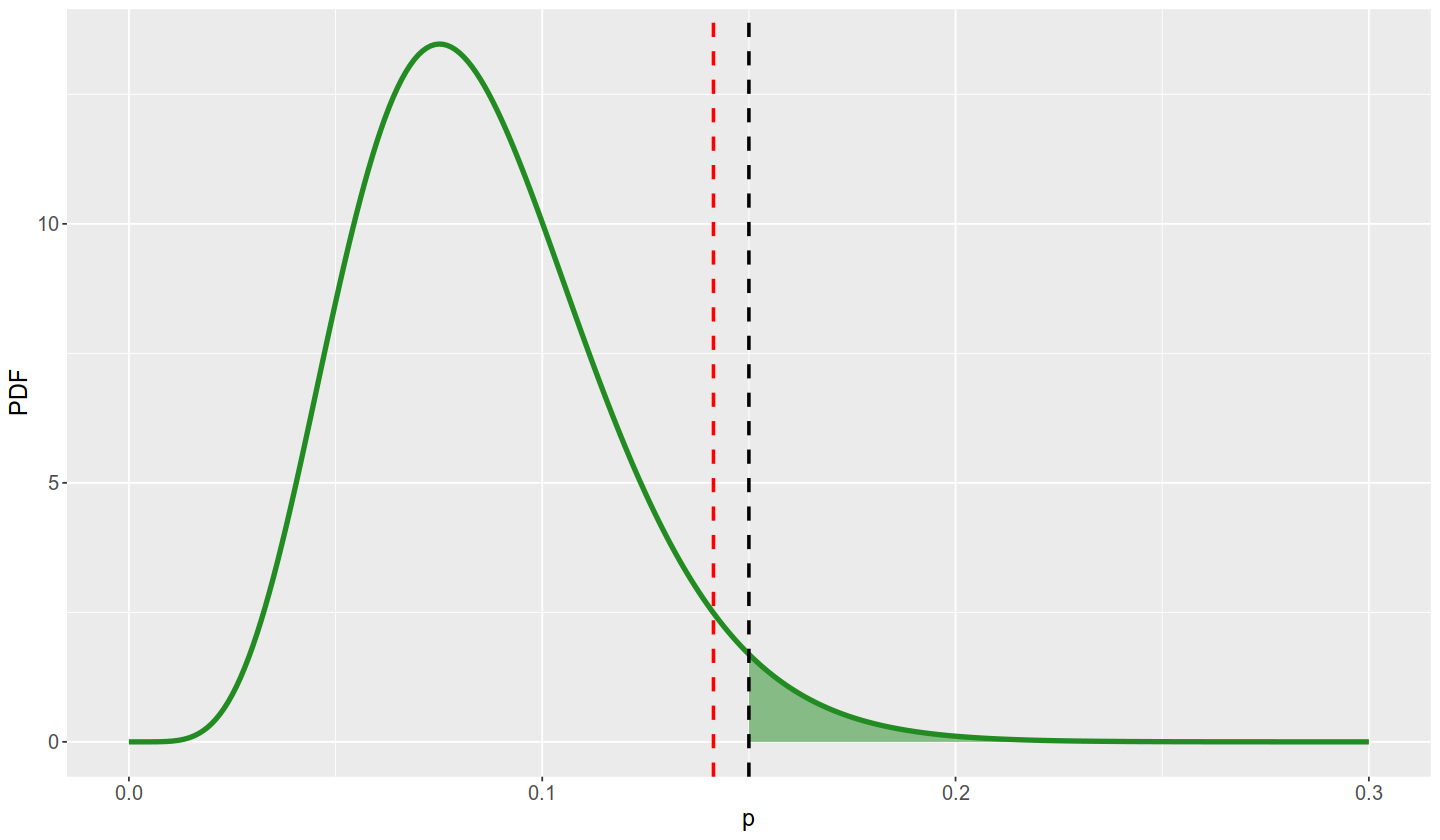

In [8]:
p <- ggplot(data, aes(x = p, y = beta.posterior))
p <- p + geom_line(size = 1.5, color = 'forestgreen')
p <- p + geom_area(aes(ifelse(p>= 0.15, p, NA)), fill = 'forestgreen', alpha = 0.5)
p <- p + geom_vline(xintercept = 0.15, col = 'black', size = 1, linetype = 'dashed')
p <- p + geom_vline(xintercept = cutoff.b, col = 'red', size = 1, linetype = 'dashed')
p <- p + xlim(0, 0.3)
p <- p + ylab('PDF')
p <- p + theme(axis.title.x = element_text(size=14), axis.text.x = element_text(size=12))
p <- p + theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12))
p

### Exercise 1e - Hypothesis Test (Frequentist approach)<a class="anchor" id="ex1e"></a>

In [9]:
binom.test(y, n, p = p.old, alternative = 'l')


	Exact binomial test

data:  y and n
number of successes = 6, number of trials = 75, p-value = 0.05435
alternative hypothesis: true probability of success is less than 0.15
95 percent confidence interval:
 0.0000000 0.1517971
sample estimates:
probability of success 
                  0.08 


In [10]:
pv.f <- pbinom(y, n, prob = p.old, lower.tail = TRUE)
cat("The p value is: ", pv.f, " which is greater than alpha. We accept H0 at this level of significance.")

The p value is:  0.0543533  which is greater than alpha. We accept H0 at this level of significance.

In [11]:
cutoff.f <- qbinom(p = .05, size = n, prob=p.old, lower.tail = TRUE)
cat("The cutoff value is in this case: ", cutoff.f, ".")

The cutoff value is in this case:  6 .

## Exercise 2 - Deaths by horse kick among the Prussian army <a class="anchor" id="ex2"></a>

In [12]:
y <-c(0,   1, 2,3, 4)
n1<-c(109,65,22,3, 1)
n2<-c(144,91,32,11,2)

### Exercise 2a - Death rate's distribution (Uniform Prior)<a class="anchor" id="ex2a"></a>


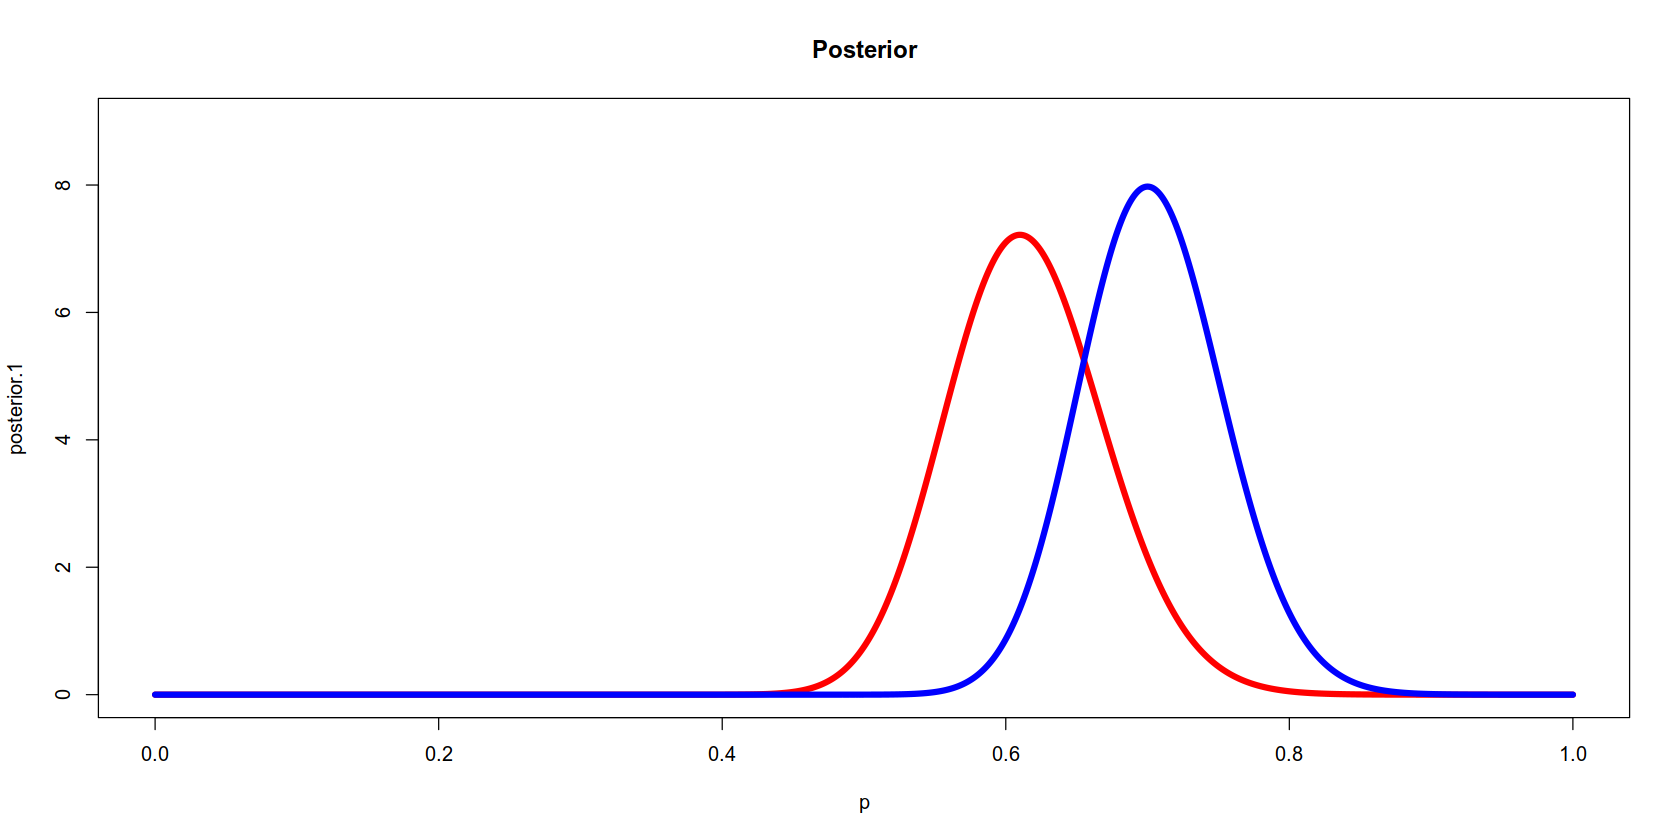

In [13]:
p<-seq(0,1,.001)
n<-length(n1)
prior<-rep(1, length(p))

alpha.1<-sum(n1*y)+1
lambda.1<-sum(n1)
posterior.1<-dgamma(x=p, shape=alpha.1, rate=lambda.1)

alpha.2<-sum(n2*y)+1
lambda.2<-sum(n2)
posterior.2<-dgamma(x=p, shape=alpha.2, rate=lambda.2)

options(repr.plot.width = 14, repr.plot.height = 7)
plot( p,posterior.1, type="l", main="Posterior", lwd=5, col='red', ylim=c(0,9) )
lines(p,posterior.2, type="l", main="Prior",     lwd=5, col='blue')


In [14]:
post<-function(p, alpha, lambda){
    return(dgamma(x=p, shape=alpha, rate=lambda))
}

Ex<-function(p, alpha, lambda){
    return(p*dgamma(x=p, shape=alpha, rate=lambda))
}

Ex2<-function(p, alpha, lambda){
    return(p*p*dgamma(x=p, shape=alpha, rate=lambda))
}

In [15]:
normalization.1<-integrate(post, lower=0, upper=1, alpha=alpha.1, lambda=lambda.1)$value
posterior.1<-post(p, alpha=alpha.1, lambda=lambda.1)/(normalization.1)
mean.1<-integrate(Ex, lower=0, upper=1, alpha=alpha.1, lambda=lambda.1)$value
var.1<-integrate(Ex2, lower=0, upper=1, alpha=alpha.1, lambda=lambda.1)$value-mean.1^2
median.1<-qgamma(.5, shape=alpha.1, rate=lambda.1)

cat("-----------Observation 1-----------\n\n")
cat("Mean: :\t",   round(mean.1,   5), 
    "\nVar:\t",    round(var.1,    5),
    "\nMedian:\t", round(median.1, 5))
cat("\n")
cat("95% CI for Uniform Prior:\t [", 
    qgamma(.025,alpha.1,lambda.1), ", ", qgamma(.975,alpha.1,lambda.1), "]")


normalization.2<-integrate(post, lower=0, upper=1, alpha=alpha.2, lambda=lambda.2)$value
posterior.2<-post(p, alpha=alpha.2, lambda=lambda.2)/(normalization.2)
mean.2<-integrate(Ex, lower=0, upper=1, alpha=alpha.2, lambda=lambda.2)$value
var.2<-integrate(Ex2, lower=0, upper=1, alpha=alpha.2, lambda=lambda.2)$value-mean.2^2
median.2<-qgamma(.5, shape=alpha.2, rate=lambda.2)

cat("\n\n-----------Observation 2-----------\n\n")
cat("Mean: :\t",   round(mean.2,   5), 
    "\nVar:\t",    round(var.2,    5),
    "\nMedian:\t", round(median.2, 5))
cat("\n")
cat("95% CI for Uniform Prior:\t [", 
    qgamma(.025,alpha.2,lambda.2), ", ", qgamma(.975,alpha.2,lambda.2), "]")


-----------Observation 1-----------

Mean: :	 0.615 
Var:	 0.00308 
Median:	 0.61333
95% CI for Uniform Prior:	 [ 0.5111251 ,  0.7283408 ]

-----------Observation 2-----------

Mean: :	 0.70357 
Var:	 0.00251 
Median:	 0.70238
95% CI for Uniform Prior:	 [ 0.6087487 ,  0.805157 ]

### Exercise 2b - Death rate's distribution (Jeffrey's Prior)<a class="anchor" id="ex2b"></a>


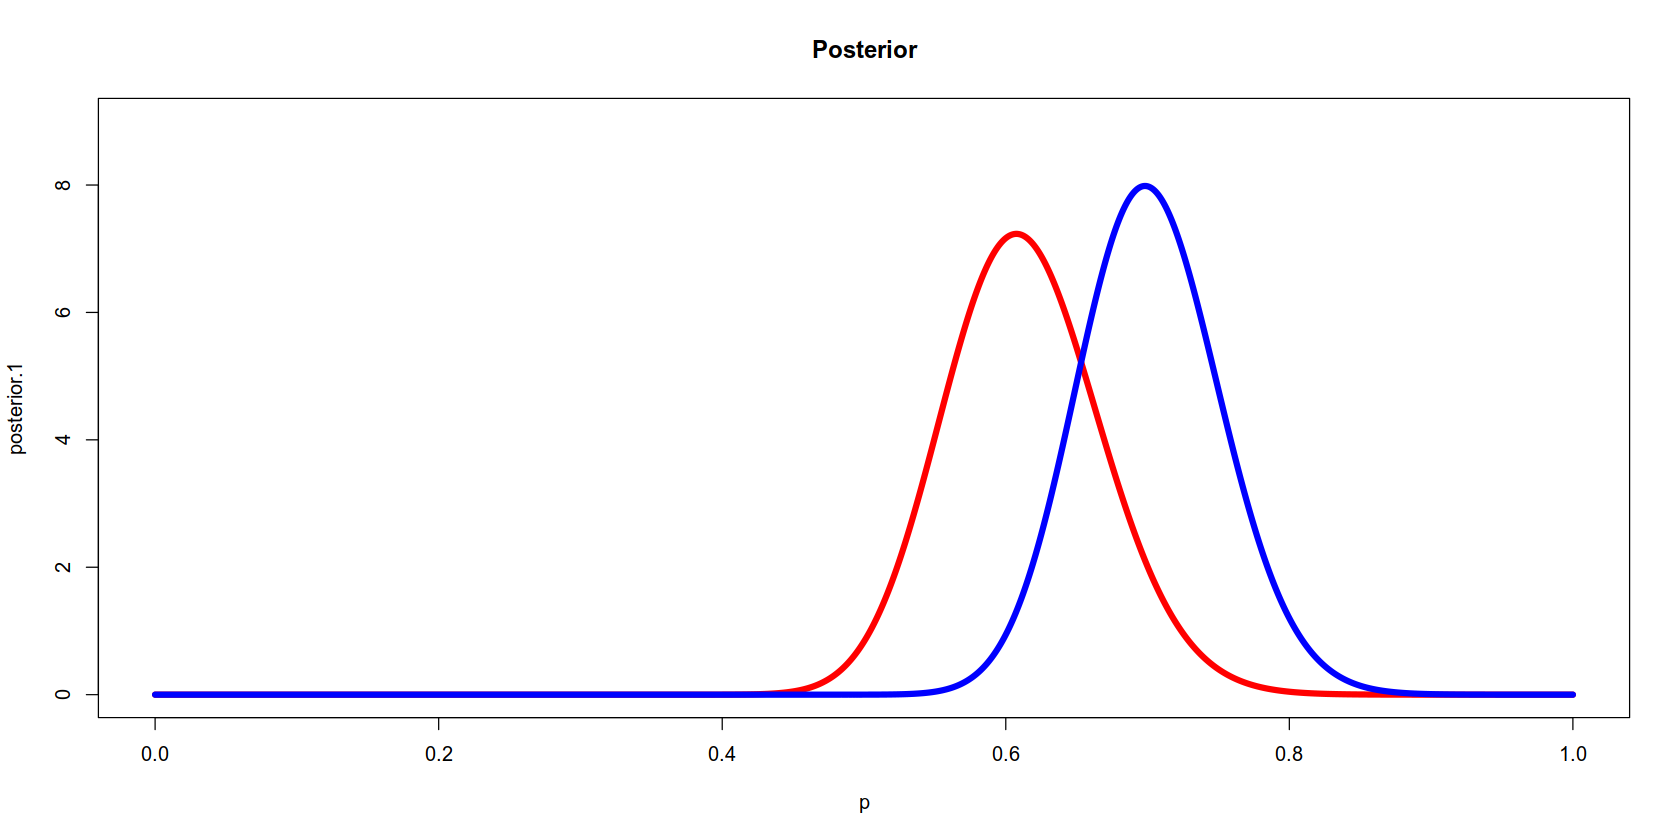

In [16]:
prior.1<-1/sqrt(p)

alpha.1<-sum(n1*y)+1/2
lambda.1 <-sum(n1)
posterior.1<-dgamma(x=p, shape=alpha.1, rate=lambda.1)

alpha.2<-sum(n2*y)+1/2
lambda.2 <-sum(n2)
posterior.2<-dgamma(x=p, shape=alpha.2, rate=lambda.2)


options(repr.plot.width = 14, repr.plot.height = 7)
plot( p,posterior.1, type="l", main="Posterior", lwd=5, col='red', ylim=c(0,9) )
lines(p,posterior.2, type="l", main="Prior",     lwd=5, col='blue')

In [17]:
normalization.1<-integrate(post, lower=0, upper=1, alpha=alpha.1, lambda=lambda.1)$value
posterior.1<-post(p, alpha=alpha.1, lambda=lambda.1)/(normalization.1)
mean.1<-integrate(Ex, lower=0, upper=1, alpha=alpha.1, lambda=lambda.1)$value
var.1<-integrate(Ex2, lower=0, upper=1, alpha=alpha.1, lambda=lambda.1)$value-mean.1^2
median.1<-qgamma(.5, shape=alpha.1, rate=lambda.1)

cat("-----------Observation 1-----------\n\n")
cat("Mean: :\t",   round(mean.1,   5), 
    "\nVar:\t",    round(var.1,    5),
    "\nMedian:\t", round(median.1, 5))
cat("\n")
cat("95% CI for Uniform Prior:\t [", 
    qgamma(.025,alpha.1,lambda.1), ", ", qgamma(.975,alpha.1,lambda.1), "]")


normalization.2<-integrate(post, lower=0, upper=1, alpha=alpha.2, lambda=lambda.2)$value
posterior.2<-post(p, alpha=alpha.2, lambda=lambda.2)/(normalization.2)
mean.2<-integrate(Ex, lower=0, upper=1, alpha=alpha.2, lambda=lambda.2)$value
var.2<-integrate(Ex2, lower=0, upper=1, alpha=alpha.2, lambda=lambda.2)$value-mean.2^2
median.2<-qgamma(.5, shape=alpha.2, rate=lambda.2)

cat("\n\n-----------Observation 2-----------\n\n")
cat("Mean: :\t",   round(mean.2,   5), 
    "\nVar:\t",    round(var.2,    5),
    "\nMedian:\t", round(median.2, 5))
cat("\n")
cat("95% CI for Uniform Prior:\t [", 
    qgamma(.025,alpha.2,lambda.2), ", ", qgamma(.975,alpha.2,lambda.2), "]")

-----------Observation 1-----------

Mean: :	 0.6125 
Var:	 0.00306 
Median:	 0.61083
95% CI for Uniform Prior:	 [ 0.5088464 ,  0.7256196 ]

-----------Observation 2-----------

Mean: :	 0.70179 
Var:	 0.00251 
Median:	 0.7006
95% CI for Uniform Prior:	 [ 0.6070878 ,  0.8032465 ]

## Exercise 3 - Water quality of streams <a class="anchor" id="ex3"></a>

In [18]:
n <- 116
y <-  11

### Exercise 3a - Frequentist estimator <a class="anchor" id="ex3a"></a>

In [19]:
pf <- y / n
sg <- sqrt(pf*(1-pf)/n)

cat("-Unbiased estimator:\t\tpf\t=\t",        pf, 
    "\n-with standard deviation:\tsigma\t=\t",sg)

-Unbiased estimator:		pf	=	 0.09482759 
-with standard deviation:	sigma	=	 0.0272022

### Exercise 3b - Posterior distribution with beta prior <a class="anchor" id="ex3b"></a>

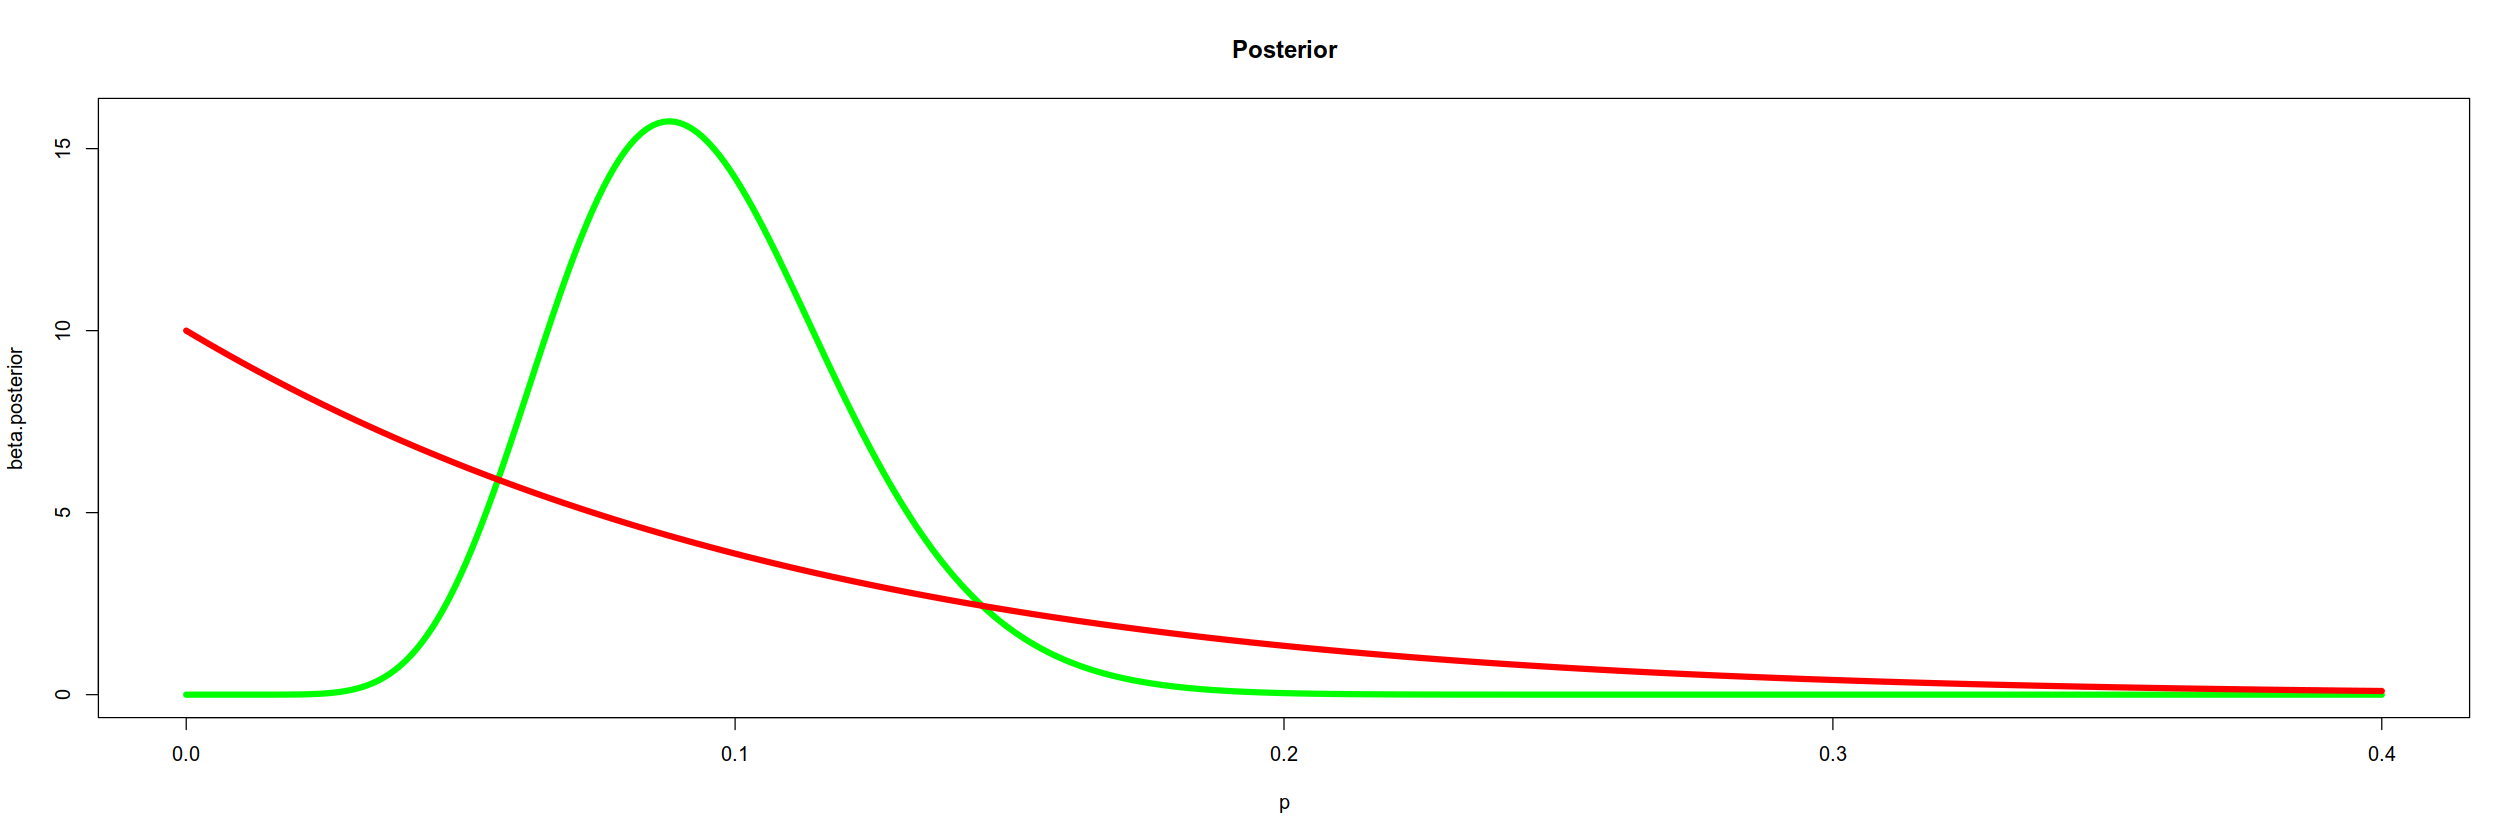

In [20]:
p<-seq(0,.4,.001)

alpha.prior<-1
beta.prior <-10

prior<-dbeta(p, alpha.prior, beta.prior)

# rule of conjugate priors
alpha.post<-alpha.prior+y
beta.post <-beta.prior-y+n
beta.posterior<-dbeta(p, alpha.post, beta.post)

alpha.old<-alpha.post
beta.old <-beta.post

options(repr.plot.width = 21, repr.plot.height = 7)
plot(p,beta.posterior, type="l", main="Posterior",     lwd=5, col='green')
lines(p,prior,          type="l", main="Uniform Prior", lwd=5, col='red'  )

### Exercise 3c - Bayesian estimator <a class="anchor" id="ex3c"></a>

In [21]:
mode     <- (alpha.post - 1)        / (alpha.post + beta.post - 2)
mean     <-  alpha.post             / (alpha.post + beta.post    )
variance <-  alpha.post * beta.post / (alpha.post + beta.post)^2 / (alpha.post + beta.post + 1)

cat("Best estimator:\t", mode,
    "\nMean:\t\t", mean, 
    "\nVar:\t\t", variance)
cat("\n")
cat("95% CI for Uniform Prior:\t [", 
    qbeta(.025,alpha.post,beta.post), ", ", qbeta(.975,alpha.post,beta.post), "]")

Best estimator:	 0.088 
Mean:		 0.09448819 
Var:		 0.0006684388
95% CI for Uniform Prior:	 [ 0.05018522 ,  0.1508379 ]

### Exercise 3d - Hypotesis test <a class="anchor" id="ex3d"></a>

In [22]:
# bayesian approach

pv.b <- pbeta(.1, alpha.post, beta.post, lower.tail = FALSE)
cat("The p value is: ", pv.b, " which is greater than alpha. We accept H0 at this level of significance.")

The p value is:  0.385815  which is greater than alpha. We accept H0 at this level of significance.

In [23]:
cutoff.b <- qbeta(.1, alpha.post, beta.post, lower.tail = FALSE)
cat("The cutoff value is in this case: ", cutoff.b, ".")

The cutoff value is in this case:  0.1287904 .

Warning message:
“Removed 200 rows containing missing values (position_stack).”
Warning message:
“Removed 100 row(s) containing missing values (geom_path).”


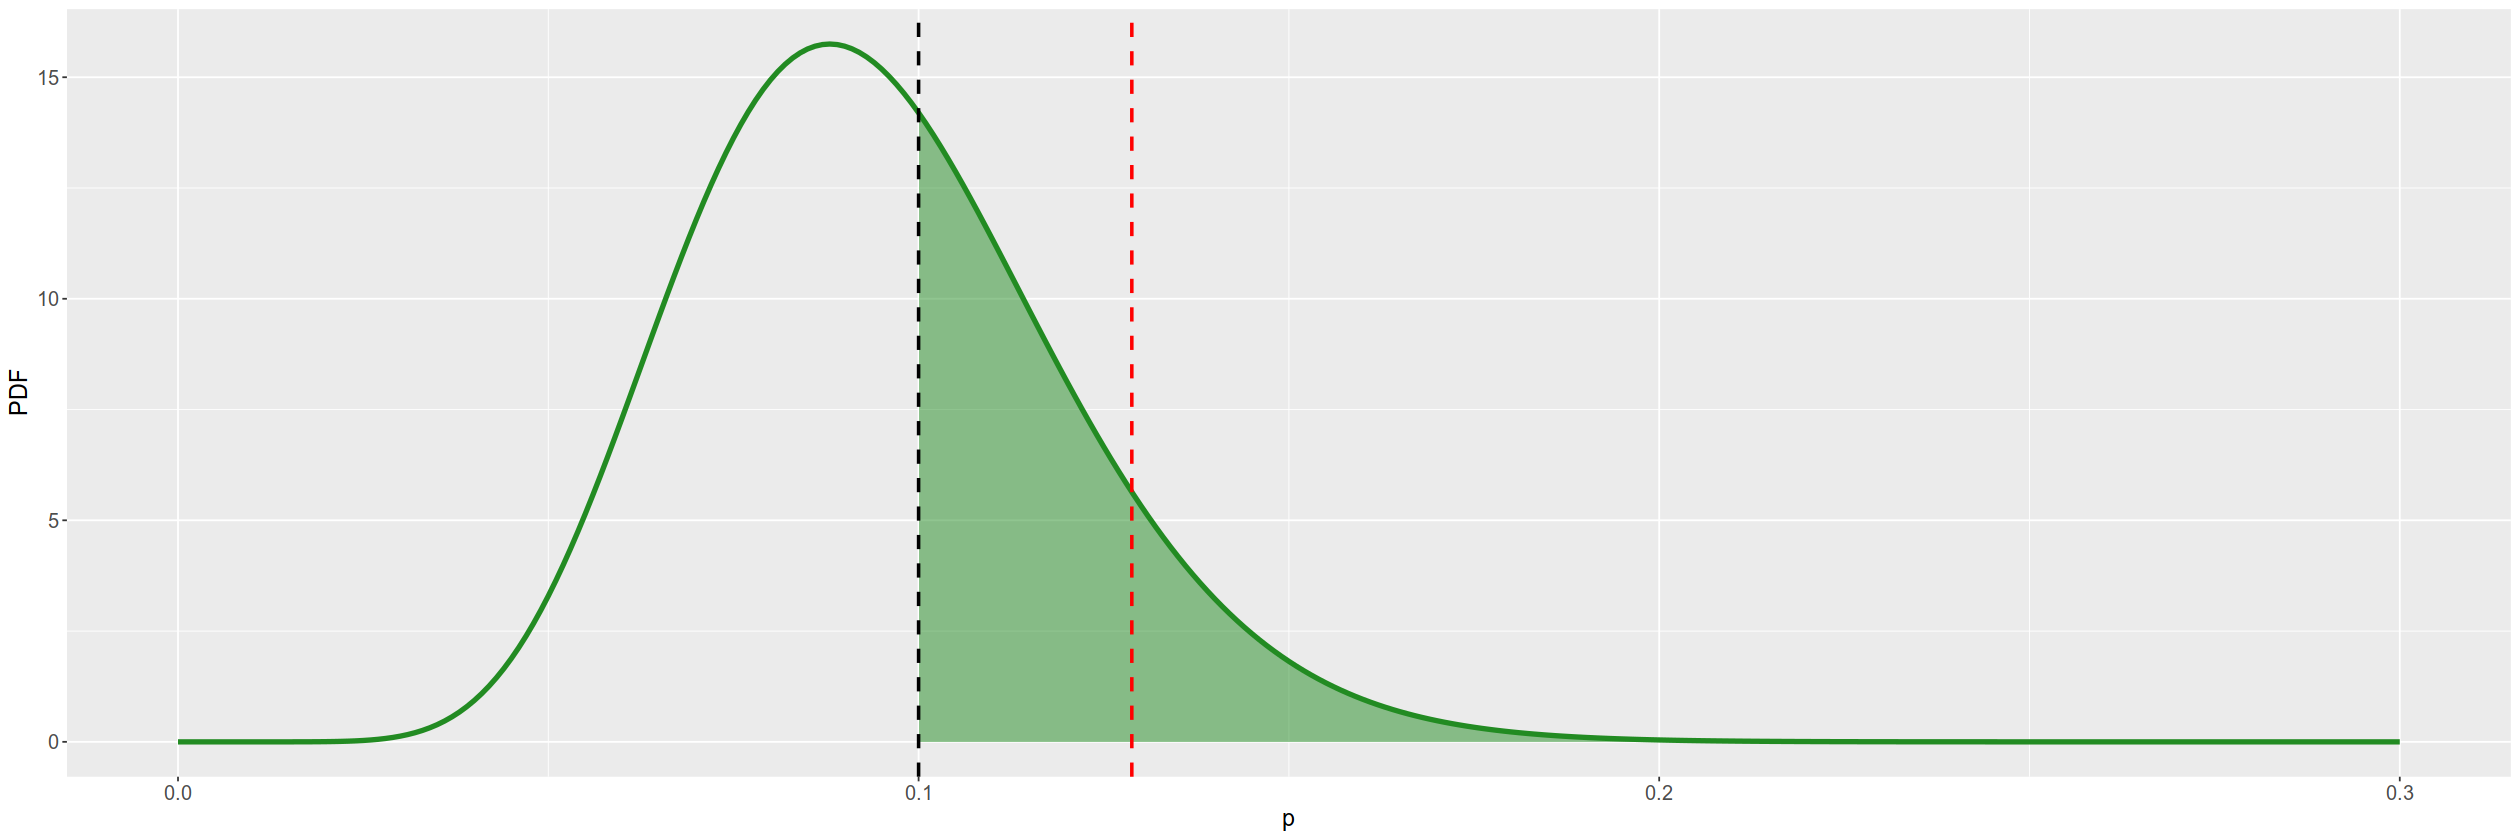

In [24]:
data = data.frame(p,prior,beta.posterior)

p <- ggplot(data, aes(x = p, y = beta.posterior))
p <- p + geom_line(size = 1.5, color = 'forestgreen')
p <- p + geom_area(aes(ifelse(p>= 0.1, p, NA)), fill = 'forestgreen', alpha = 0.5)
p <- p + geom_vline(xintercept = 0.1, col = 'black', size = 1, linetype = 'dashed')
p <- p + geom_vline(xintercept = cutoff.b, col = 'red', size = 1, linetype = 'dashed')
p <- p + xlim(0, 0.3)
p <- p + ylab('PDF')
p <- p + theme(axis.title.x = element_text(size=14), axis.text.x = element_text(size=12))
p <- p + theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12))
p

In [25]:
# frequentist approach

binom.test(y, n, p = .1, alternative = 'l')


	Exact binomial test

data:  y and n
number of successes = 11, number of trials = 116, p-value = 0.5043
alternative hypothesis: true probability of success is less than 0.1
95 percent confidence interval:
 0.0000000 0.1520786
sample estimates:
probability of success 
            0.09482759 


### Exercise 3e - Frequentist estimator <a class="anchor" id="ex3e"></a>

In [26]:
n <- 165
y <- 9

In [27]:
pf <- y / n
cat("Frequentist estimator:\t", pf)

Frequentist estimator:	 0.05454545

### Exercise 3f - Bayesian estimator with Beta prior and custom prior <a class="anchor" id="ex3f"></a>
and
### Exercise 3g - Mean and variance <a class="anchor" id="ex3g"></a>

Best estimator:	 0.05172414 
Mean:		 0.05681818 
Var:		 0.0003027677
95% CI for Uniform Prior:	 [ 0.02773918 ,  0.09538012 ]

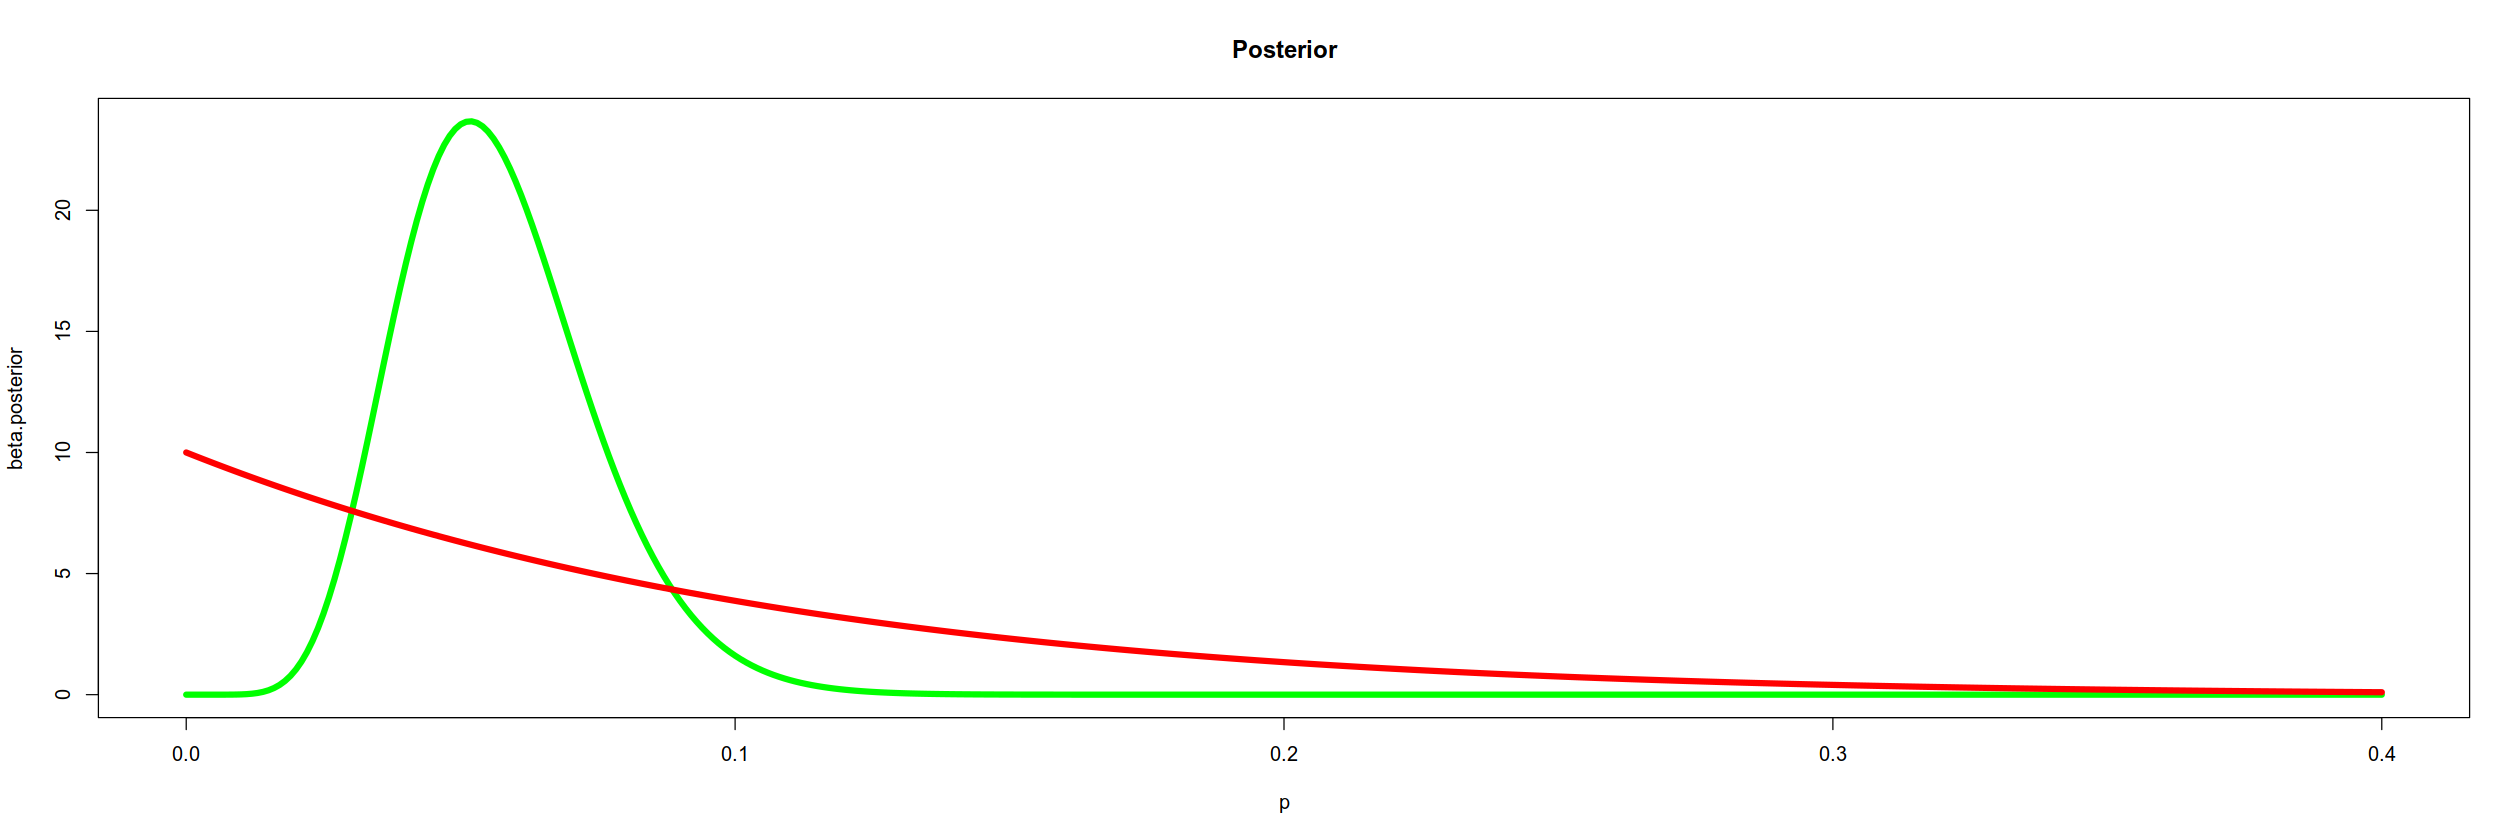

In [28]:
# beta prior

p<-seq(0,.4,.001)

alpha.prior<-1
beta.prior <-10

prior<-dbeta(p, alpha.prior, beta.prior)

# rule of conjugate priors
alpha.post<-alpha.prior+y
beta.post <-beta.prior-y+n
beta.posterior<-dbeta(p, alpha.post, beta.post)

options(repr.plot.width = 21, repr.plot.height = 7)
plot(p,beta.posterior, type="l", main="Posterior",      lwd=5, col='green')
lines(p,prior,          type="l", main="Uniform Prior", lwd=5, col='red'  )

mode <- (alpha.post - 1) / (alpha.post + beta.post - 2)
mean     <-  alpha.post             / (alpha.post + beta.post    )
variance <-  alpha.post * beta.post / (alpha.post + beta.post)^2 / (alpha.post + beta.post + 1)

cat("Best estimator:\t", mode,
    "\nMean:\t\t", mean, 
    "\nVar:\t\t", variance)
cat("\n")
cat("95% CI for Uniform Prior:\t [", 
    qbeta(.025,alpha.post,beta.post), ", ", qbeta(.975,alpha.post,beta.post), "]")

Best estimator:	 0.06896552 
Mean:		 0.07191781 
Var:		 0.0002278008
95% CI for Uniform Prior:	 [ 0.04522356 ,  0.1041519 ]

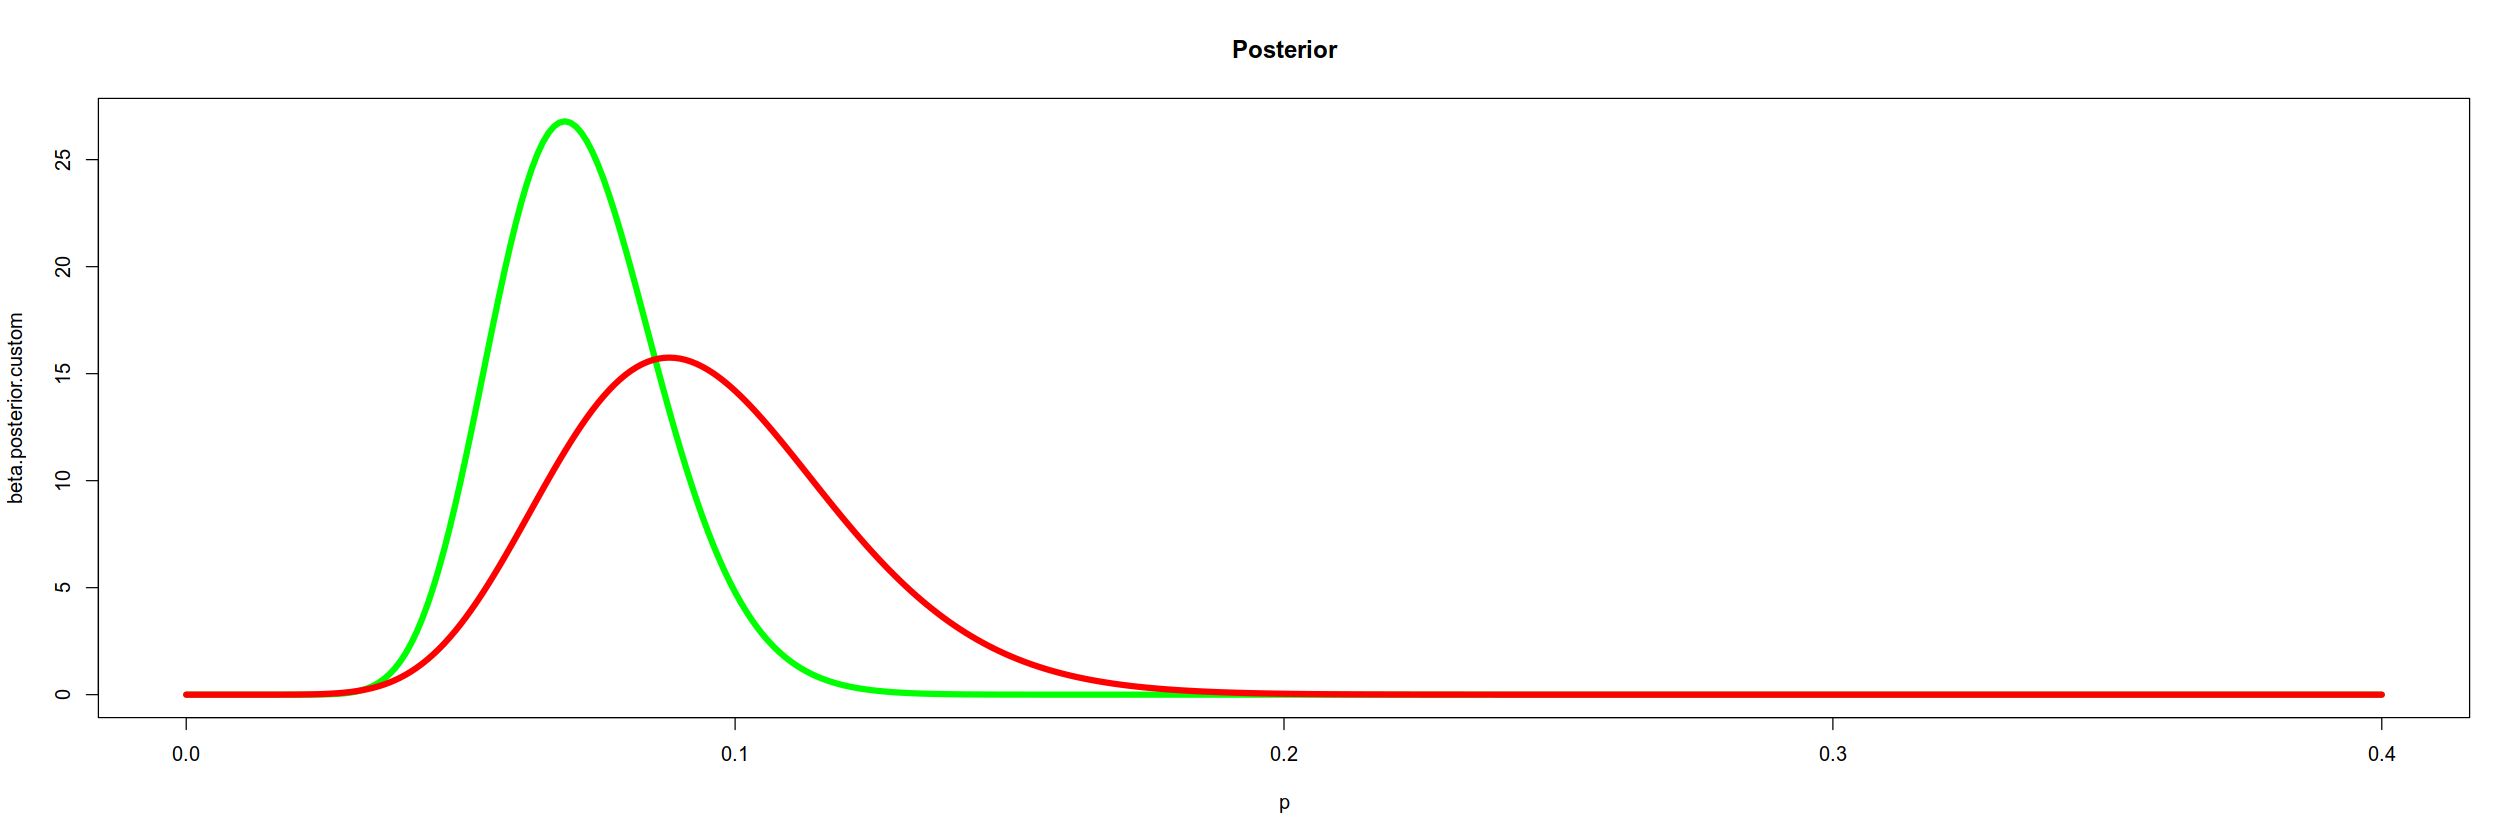

In [29]:
# custom prior

prior<-dbeta(p, alpha.old, beta.old)

# rule of conjugate priors
alpha.post.custom<-alpha.old+y
beta.post.custom <-beta.old-y+n
beta.posterior.custom<-dbeta(p, alpha.post.custom, beta.post.custom)

data.custom = data.frame(p,prior,beta.posterior.custom)

options(repr.plot.width = 21, repr.plot.height = 7)
plot(p,beta.posterior.custom, type="l", main="Posterior",      lwd=5, col='green')
lines(p,prior,          type="l", main="Uniform Prior", lwd=5, col='red'  )

mode <- (alpha.post.custom - 1) / (alpha.post.custom + beta.post.custom - 2)
mean     <-  alpha.post.custom             / (alpha.post.custom + beta.post.custom    )
variance <-  alpha.post.custom * beta.post.custom / (alpha.post.custom + beta.post.custom)^2 / (alpha.post.custom + beta.post.custom + 1)

cat("Best estimator:\t", mode,
    "\nMean:\t\t", mean, 
    "\nVar:\t\t", variance)
cat("\n")
cat("95% CI for Uniform Prior:\t [", 
    qbeta(.025,alpha.post.custom,beta.post.custom), ", ", qbeta(.975,alpha.post.custom,beta.post.custom), "]")

### Exercise 3h - Hypotesis test <a class="anchor" id="ex3h"></a>

The p value is:  0.01574077  which is less than alpha. We reject H0 at this level of significance.
The cutoff value is in this case:  0.07996788 .

Warning message:
“Removed 200 rows containing missing values (position_stack).”
Warning message:
“Removed 100 row(s) containing missing values (geom_path).”


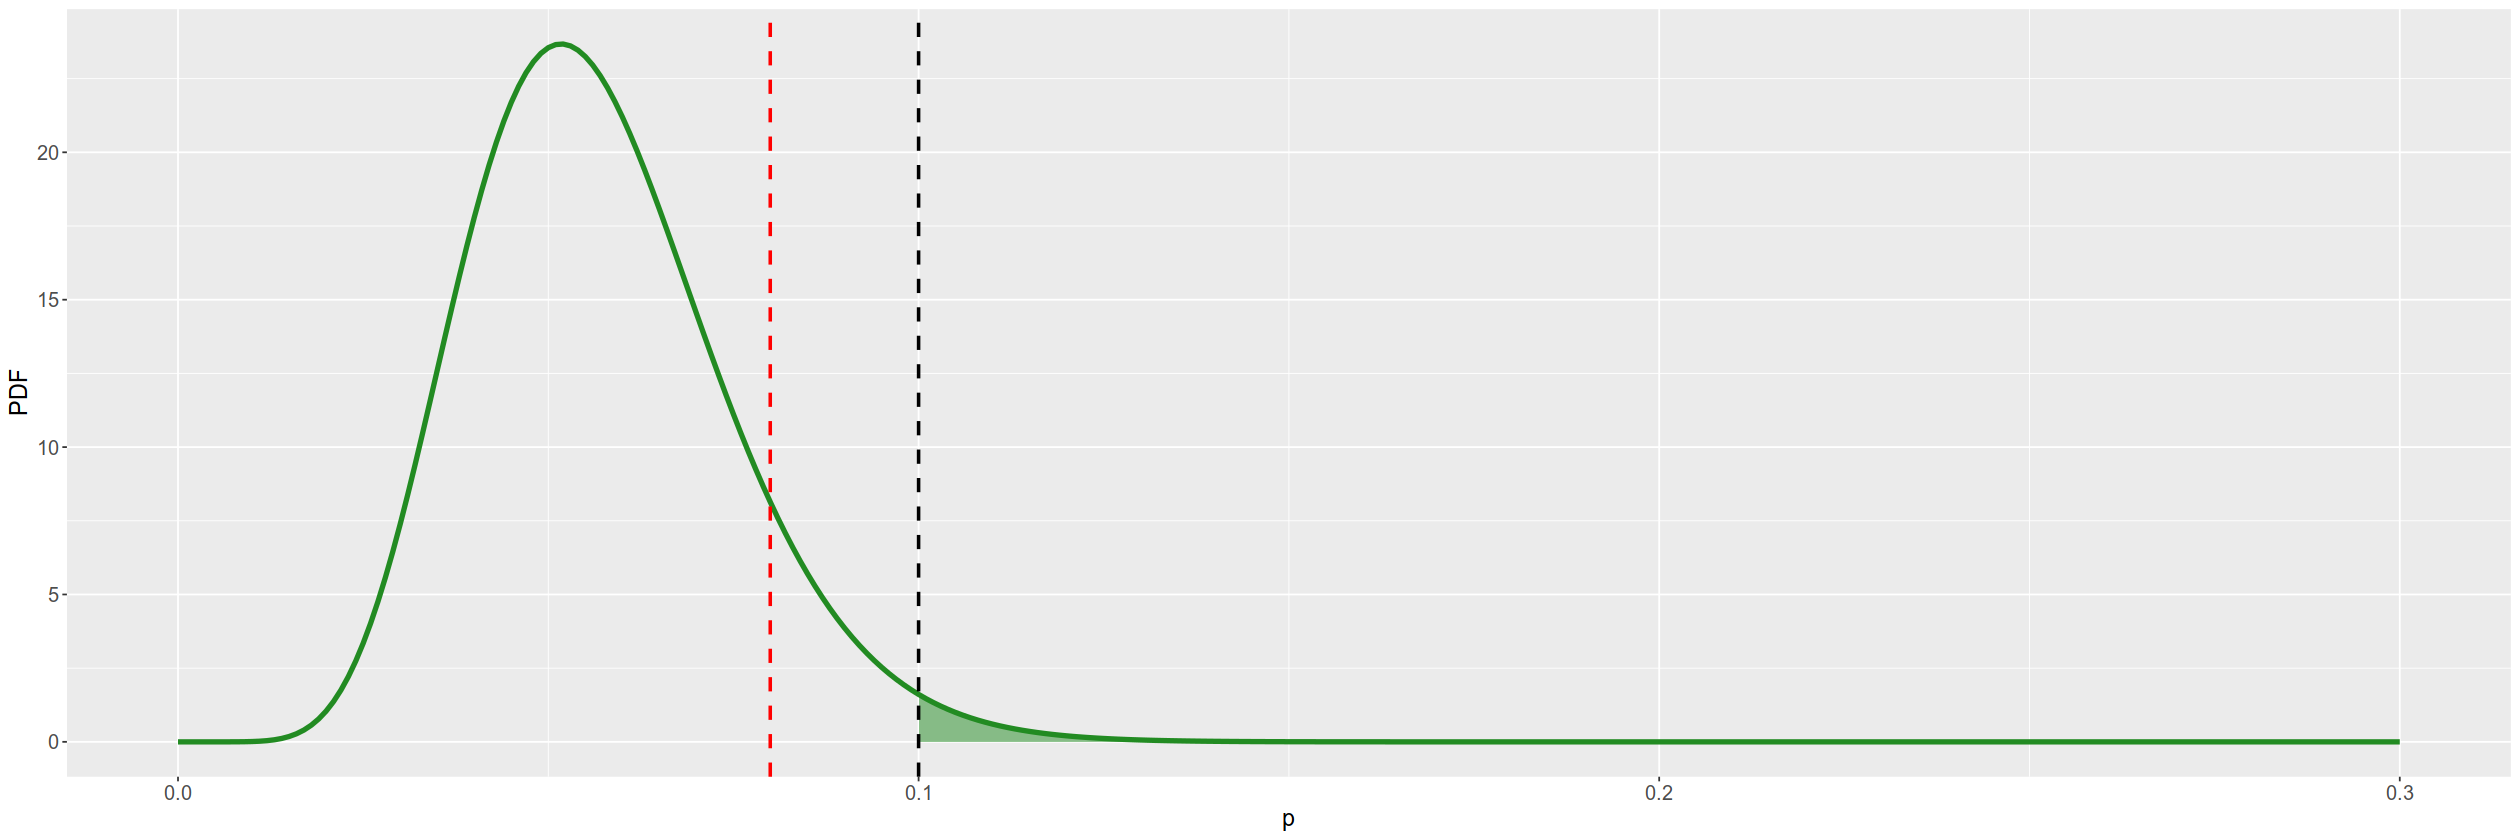

In [30]:
# bayesian approach

pv.b <- pbeta(.1, alpha.post, beta.post, lower.tail = FALSE)
cat("The p value is: ", pv.b, " which is less than alpha. We reject H0 at this level of significance.")
cat("\n")
cutoff.b <- qbeta(.1, alpha.post, beta.post, lower.tail = FALSE)
cat("The cutoff value is in this case: ", cutoff.b, ".")

data = data.frame(p,prior,beta.posterior)

p <- ggplot(data, aes(x = p, y = beta.posterior))
p <- p + geom_line(size = 1.5, color = 'forestgreen')
p <- p + geom_area(aes(ifelse(p>= 0.1, p, NA)), fill = 'forestgreen', alpha = 0.5)
p <- p + geom_vline(xintercept = 0.1, col = 'black', size = 1, linetype = 'dashed')
p <- p + geom_vline(xintercept = cutoff.b, col = 'red', size = 1, linetype = 'dashed')
p <- p + xlim(0, 0.3)
p <- p + ylab('PDF')
p <- p + theme(axis.title.x = element_text(size=14), axis.text.x = element_text(size=12))
p <- p + theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12))
p

The p value is:  0.04117008  which is less than alpha. We reject H0 at this level of significance.
The cutoff value is in this case:  0.09180464 .

Warning message:
“Removed 200 rows containing missing values (position_stack).”
Warning message:
“Removed 100 row(s) containing missing values (geom_path).”


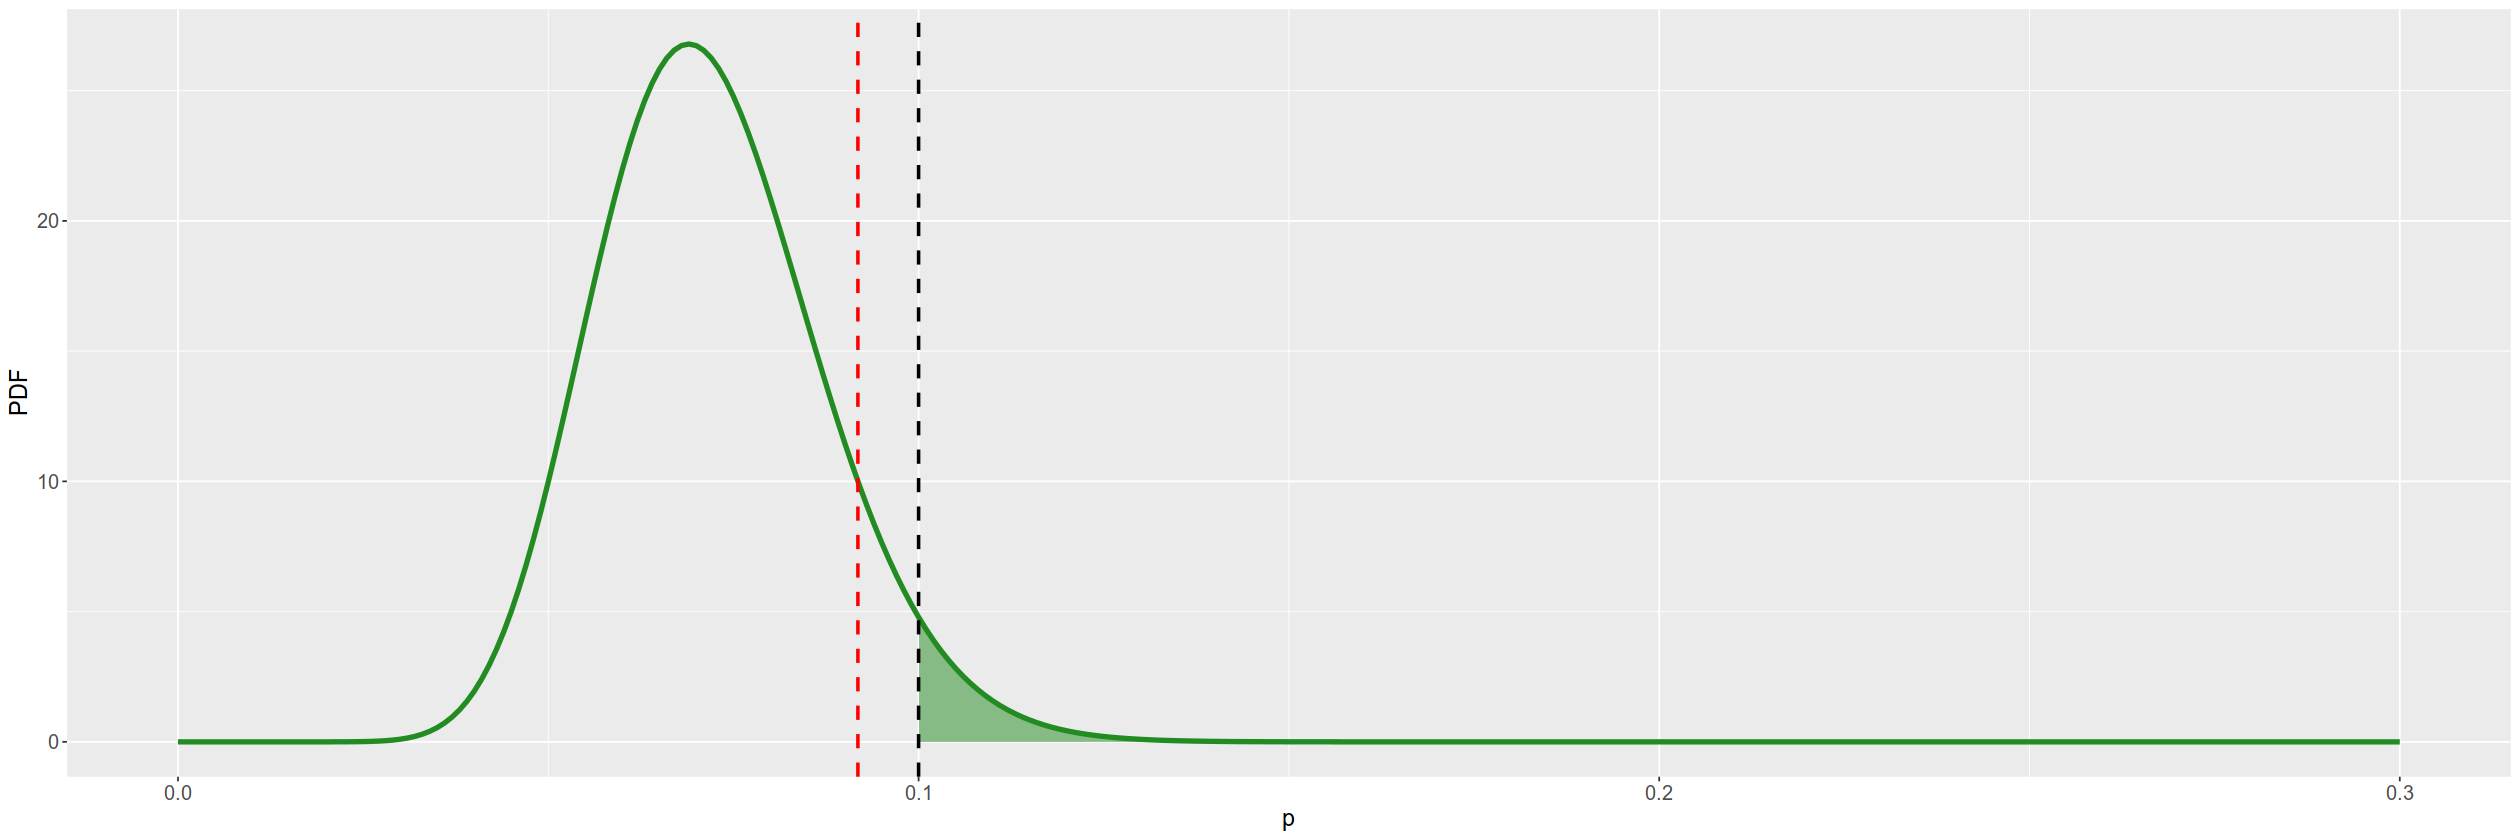

In [31]:
# bayesian approach custom function

pv.b <- pbeta(.1, alpha.post.custom, beta.post.custom, lower.tail = FALSE)
cat("The p value is: ", pv.b, " which is less than alpha. We reject H0 at this level of significance.")
cat("\n")
cutoff.b <- qbeta(.1, alpha.post.custom, beta.post.custom, lower.tail = FALSE)
cat("The cutoff value is in this case: ", cutoff.b, ".")

p <- ggplot(data, aes(x = p, y = beta.posterior.custom))
p <- p + geom_line(size = 1.5, color = 'forestgreen')
p <- p + geom_area(aes(ifelse(p>= 0.1, p, NA)), fill = 'forestgreen', alpha = 0.5)
p <- p + geom_vline(xintercept = 0.1, col = 'black', size = 1, linetype = 'dashed')
p <- p + geom_vline(xintercept = cutoff.b, col = 'red', size = 1, linetype = 'dashed')
p <- p + xlim(0, 0.3)
p <- p + ylab('PDF')
p <- p + theme(axis.title.x = element_text(size=14), axis.text.x = element_text(size=12))
p <- p + theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12))
p

## Exercise 4 - MCMC with JAGS <a class="anchor" id="ex4"></a>

In [32]:
data_obs <- c(0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
              0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
              0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
              0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 1, 0, 0, 1, 0, 1)

myData <- data.frame("y"=data_obs)

In [33]:
modelString = "
model {
    for ( i in 1:Ntotal ) {
        y[i] ~ dbern( theta )
    }
    theta ~ dbeta( 1 , 1 )
    }
"
writeLines ( modelString , con="jags_bern01_model.txt")

In [34]:
#myData <- read.csv("bern_jags -stan.csv")
y <- myData$y
Ntotal <- length(y)
dataList <- list(y = y, Ntotal = Ntotal)

In [35]:
model <- jags.model(file="jags_bern01_model.txt",
                    data=dataList ,
                    # inits=initsList ,
                    n.chains=3,
                    n.adapt=500)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 100
   Unobserved stochastic nodes: 1
   Total graph size: 103

Initializing model



In [36]:
update(model , n.iter=500)

In [51]:
chain <- coda.samples(model , variable.names=c("theta"), n.iter=10000)

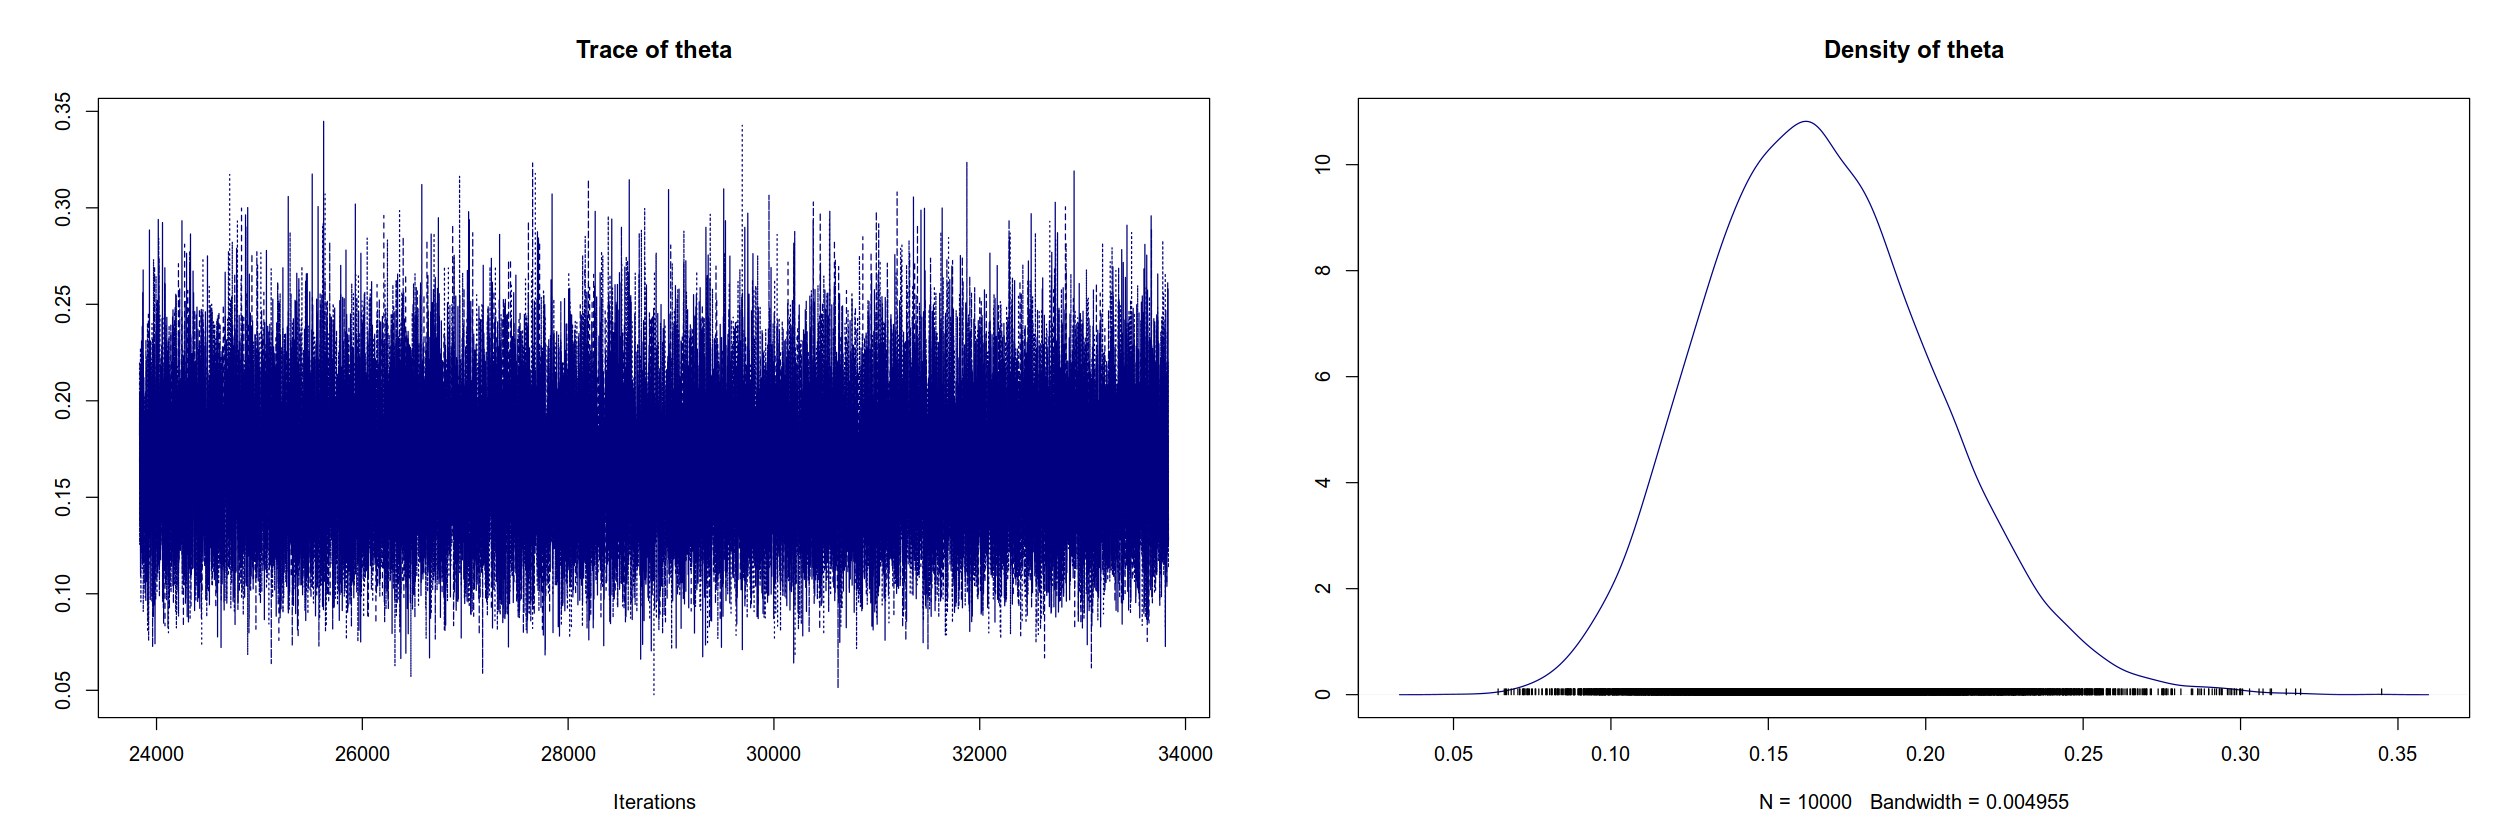

In [52]:
plot(chain , col="navy")

In [44]:
# Let’s format our chain
chain.df <- as.data.frame( chain )

ERROR: Error in as.data.frame.default(chain): cannot coerce class ‘"mcmc.list"’ to a data.frame


In [ ]:
# Probability plots
par(mfrow=c(3,2), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
hist(chain.df$lambda , nc=100, prob=TRUE , col=’darkolivegreen2’,
xlim=c(40, 170),
xlab=’lambda’, ylab=’f(lambda)’, main=’Inference on lambda’)
ty <- table(chain.df$Y)
barplot(ty/sum(ty), col=’firebrick2’, xlab=’Y’, ylab=’f(Y)’,
# ylim=c(0,0.40),
main=sprintf(’Predicted counts’))
#
# And present/ future prediction correlations
plot(chain.df$lambda , chain.df$Y, xlab=’lambda’, ylab=’y’, main="",
pch=’+’, col=’navy’, cex=0.75, asp=1,
xlim=c(50,160), ylim=c(50,160))